In [1]:
import seaborn as sns
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

df = pd.read_csv('Dataset_dating.csv')

In [2]:
df.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

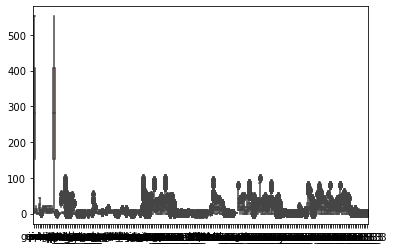

In [3]:
sns.boxplot(data=df)

<AxesSubplot:xlabel='dec_o'>

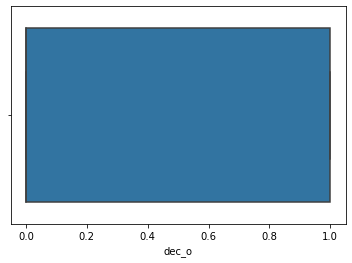

In [4]:
sns.boxplot(x='dec_o', data=df)

In [5]:
df.describe()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,...,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
mean,283.675937,8.960248,0.500597,17.327166,1.828837,11.350919,16.872046,9.042731,9.295775,8.927668,...,7.240312,8.093357,8.388777,7.658782,7.391545,6.810020,7.615079,7.932540,7.155258,7.048611
std,158.583367,5.491329,0.500029,10.940735,0.376673,5.995903,4.358458,5.514939,5.650199,5.477009,...,1.576596,1.610309,1.459094,1.744670,1.961417,1.507341,1.504551,1.340868,1.672787,1.717988
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,3.000000,2.000000,1.000000,2.000000,2.000000,4.000000,1.000000,1.000000
25%,154.000000,4.000000,0.000000,8.000000,2.000000,7.000000,14.000000,4.000000,4.000000,4.000000,...,7.000000,7.000000,8.000000,7.000000,6.000000,6.000000,7.000000,7.000000,6.000000,6.000000
50%,281.000000,8.000000,1.000000,16.000000,2.000000,11.000000,18.000000,8.000000,9.000000,8.000000,...,7.000000,8.000000,8.000000,8.000000,8.000000,7.000000,8.000000,8.000000,7.000000,7.000000
75%,407.000000,13.000000,1.000000,26.000000,2.000000,15.000000,20.000000,13.000000,14.000000,13.000000,...,8.000000,9.000000,9.000000,9.000000,9.000000,8.000000,9.000000,9.000000,8.000000,8.000000
max,552.000000,22.000000,1.000000,44.000000,2.000000,21.000000,22.000000,22.000000,22.000000,22.000000,...,12.000000,12.000000,12.000000,12.000000,12.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [6]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 195 columns):
 #    Column    Dtype  
---   ------    -----  
 0    iid       int64  
 1    id        float64
 2    gender    int64  
 3    idg       int64  
 4    condtn    int64  
 5    wave      int64  
 6    round     int64  
 7    position  int64  
 8    positin1  float64
 9    order     int64  
 10   partner   int64  
 11   pid       float64
 12   match     int64  
 13   int_corr  float64
 14   samerace  int64  
 15   age_o     float64
 16   race_o    float64
 17   pf_o_att  float64
 18   pf_o_sin  float64
 19   pf_o_int  float64
 20   pf_o_fun  float64
 21   pf_o_amb  float64
 22   pf_o_sha  float64
 23   dec_o     int64  
 24   attr_o    float64
 25   sinc_o    float64
 26   intel_o   float64
 27   fun_o     float64
 28   amb_o     float64
 29   shar_o    float64
 30   like_o    float64
 31   prob_o    float64
 32   met_o     float64
 33   age       float64
 34   field     object 
 35 

In [7]:
df.drop(labels=['id','idg','iid','wave','round', ], axis=1)

,gender,condtn,position,positin1,order,partner,pid,match,int_corr,samerace,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,0,1,7,NaN,4,1,11.0,0,0.14,0,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,0,1,7,NaN,3,2,12.0,0,0.54,0,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,0,1,7,NaN,10,3,13.0,1,0.16,1,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,0,1,7,NaN,5,4,14.0,1,0.61,0,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,0,1,7,NaN,7,5,15.0,1,0.21,0,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,1,2,14,10.0,5,18,526.0,0,0.64,0,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8374,1,2,13,10.0,4,19,527.0,0,0.71,0,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8375,1,2,19,10.0,10,20,528.0,0,-0.46,0,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8376,1,2,3,10.0,16,21,529.0,0,0.62,0,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0


In [8]:
sub1_df = df[['gender','match','age','field_cd','race','imprace','imprelig','goal','date','go_out','career_c','exphappy','expnum']]

In [9]:
sub1_df.head()

,gender,match,age,field_cd,race,imprace,imprelig,goal,date,go_out,career_c,exphappy,expnum
0,0,0,21.0,1.0,4.0,2.0,4.0,2.0,7.0,1.0,NaN,3.0,2.0
1,0,0,21.0,1.0,4.0,2.0,4.0,2.0,7.0,1.0,NaN,3.0,2.0
2,0,1,21.0,1.0,4.0,2.0,4.0,2.0,7.0,1.0,NaN,3.0,2.0
3,0,1,21.0,1.0,4.0,2.0,4.0,2.0,7.0,1.0,NaN,3.0,2.0
4,0,1,21.0,1.0,4.0,2.0,4.0,2.0,7.0,1.0,NaN,3.0,2.0


In [10]:
sub1_df.describe()

,gender,match,age,field_cd,race,imprace,imprelig,goal,date,go_out,career_c,exphappy,expnum
count,8378.000000,8378.000000,8283.000000,8296.000000,8315.000000,8299.000000,8299.000000,8299.000000,8281.000000,8299.000000,8240.000000,8277.000000,1800.000000
mean,0.500597,0.164717,26.358928,7.662488,2.757186,3.784793,3.651645,2.122063,5.006762,2.158091,5.277791,5.534131,5.570556
std,0.500029,0.370947,3.566763,3.758935,1.230905,2.845708,2.805237,1.407181,1.444531,1.105246,3.309520,1.734059,4.762569
min,0.000000,0.000000,18.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,24.000000,5.000000,2.000000,1.000000,1.000000,1.000000,4.000000,1.000000,2.000000,5.000000,2.000000
50%,1.000000,0.000000,26.000000,8.000000,2.000000,3.000000,3.000000,2.000000,5.000000,2.000000,6.000000,6.000000,4.000000
75%,1.000000,0.000000,28.000000,10.000000,4.000000,6.000000,6.000000,2.000000,6.000000,3.000000,7.000000,7.000000,8.000000
max,1.000000,1.000000,55.000000,18.000000,6.000000,10.000000,10.000000,6.000000,7.000000,7.000000,17.000000,10.000000,20.000000


In [11]:
sub1_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gender    8378 non-null   int64  
 1   match     8378 non-null   int64  
 2   age       8283 non-null   float64
 3   field_cd  8296 non-null   float64
 4   race      8315 non-null   float64
 5   imprace   8299 non-null   float64
 6   imprelig  8299 non-null   float64
 7   goal      8299 non-null   float64
 8   date      8281 non-null   float64
 9   go_out    8299 non-null   float64
 10  career_c  8240 non-null   float64
 11  exphappy  8277 non-null   float64
 12  expnum    1800 non-null   float64
dtypes: float64(11), int64(2)
memory usage: 851.0 KB


In [12]:
df_sub1 = sub1_df.dropna()

In [13]:
df_sub1.head()

,gender,match,age,field_cd,race,imprace,imprelig,goal,date,go_out,career_c,exphappy,expnum
30,0,0,23.0,1.0,2.0,1.0,1.0,1.0,5.0,1.0,1.0,1.0,2.0
31,0,0,23.0,1.0,2.0,1.0,1.0,1.0,5.0,1.0,1.0,1.0,2.0
32,0,0,23.0,1.0,2.0,1.0,1.0,1.0,5.0,1.0,1.0,1.0,2.0
33,0,1,23.0,1.0,2.0,1.0,1.0,1.0,5.0,1.0,1.0,1.0,2.0
34,0,0,23.0,1.0,2.0,1.0,1.0,1.0,5.0,1.0,1.0,1.0,2.0


In [14]:
df_sub1.describe()

,gender,match,age,field_cd,race,imprace,imprelig,goal,date,go_out,career_c,exphappy,expnum
count,1741.000000,1741.000000,1741.000000,1741.000000,1741.000000,1741.000000,1741.000000,1741.000000,1741.000000,1741.000000,1741.000000,1741.000000,1741.000000
mean,0.516370,0.184377,25.192418,6.365882,2.714532,3.780011,3.848363,2.254451,4.995979,2.062033,4.816772,5.553130,5.628374
std,0.499876,0.387903,3.589619,3.925157,1.248706,2.851169,2.972476,1.655412,1.466674,1.152035,3.240951,1.602501,4.800776
min,0.000000,0.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,22.000000,3.000000,2.000000,1.000000,1.000000,1.000000,4.000000,1.000000,2.000000,5.000000,2.000000
50%,1.000000,0.000000,25.000000,8.000000,2.000000,3.000000,3.000000,2.000000,5.000000,2.000000,5.000000,6.000000,4.000000
75%,1.000000,0.000000,27.000000,9.000000,4.000000,6.000000,6.000000,2.000000,6.000000,3.000000,7.000000,7.000000,8.000000
max,1.000000,1.000000,39.000000,16.000000,6.000000,10.000000,10.000000,6.000000,7.000000,7.000000,14.000000,10.000000,20.000000


In [15]:
df_sub1.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1741 entries, 30 to 1845
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gender    1741 non-null   int64  
 1   match     1741 non-null   int64  
 2   age       1741 non-null   float64
 3   field_cd  1741 non-null   float64
 4   race      1741 non-null   float64
 5   imprace   1741 non-null   float64
 6   imprelig  1741 non-null   float64
 7   goal      1741 non-null   float64
 8   date      1741 non-null   float64
 9   go_out    1741 non-null   float64
 10  career_c  1741 non-null   float64
 11  exphappy  1741 non-null   float64
 12  expnum    1741 non-null   float64
dtypes: float64(11), int64(2)
memory usage: 190.4 KB


Bevore this part I used boxplots to get a idea of the data. After that I took a look at the useable variables and isolated those in a subset. Than I checkt what if they all were floats or int's so it would be able to perdict. And I dropt the nan after I subsetted the data because if I did it before I would get a empty dataset.

In [16]:
X = df_sub1.loc[:, ~df_sub1.columns.isin(['match'])]
Y = df_sub1['match']

X = normalize(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=69)
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.040291,0.886405,0.040291,0.241747,0.040291,0.040291,0.241747,0.201456,0.080582,0.040291,0.201456,0.040291
1,0.000000,0.755419,0.361287,0.197066,0.197066,0.098533,0.065689,0.164222,0.098533,0.098533,0.229910,0.328443
2,0.033923,0.881990,0.169613,0.101768,0.101768,0.203536,0.033923,0.237459,0.033923,0.067845,0.237459,0.101768
3,0.036711,0.881068,0.293689,0.073422,0.036711,0.036711,0.220267,0.220267,0.110133,0.073422,0.110133,0.036711
4,0.030861,0.894959,0.308607,0.061721,0.123443,0.030861,0.061721,0.154303,0.061721,0.061721,0.154303,0.154303


In [17]:
knn = KNeighborsClassifier()
knn = knn.fit(X_train, Y_train)

In [18]:
knn.score(X_test, Y_test)

0.8565965583173997

I normalized the data. This was because we had values that varied quite a lot in value. So now all the value have the same woth. This can be seen in het 86% that the model is correct. Now I will make a confusion matrix to see how many time it is right in absolute numbers.

In [19]:
Y_test_pred = knn.predict(X_test)
cm = confusion_matrix(Y_test, Y_test_pred)
cm

array([[424,  19],
       [ 56,  24]], dtype=int64)

In [20]:
Y_test_pred = knn.predict(X_test)
cm = confusion_matrix(Y_test, Y_test_pred)
conf_matrix = pd.DataFrame(cm, index=['No match (actual)', 'Match (actual)'], columns = ['No match (predicted)', 'Match (predicted)'])
conf_matrix

,No match (predicted),Match (predicted)
No match (actual),424,19
Match (actual),56,24


In [21]:
git remote add origin https://github.com/Studiebol/Assignment_week5_dating.git
git branch -M main
git push -u origin main

SyntaxError: invalid syntax (<ipython-input-21-80e2e2f3a5b3>, line 1)